# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Para clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

# Para evaluar
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# KMeans
kmeans = KMeans(n_clusters=8)
kmeans_modelo = kmeans.fit(X)

In [5]:
# Cuántos clusters tenemos
len(kmeans_modelo.cluster_centers_)

8

In [6]:
#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans_modelo.labels_, metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:
# KMeans
kmeans = KMeans(n_clusters=5)
kmeans_modelo = kmeans.fit(X)

#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans_modelo.labels_, metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.548999323979569


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
# KMeans
kmeans = KMeans(n_clusters=3)
kmeans_modelo = kmeans.fit(X)

#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans_modelo.labels_, metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.5711381937868842


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

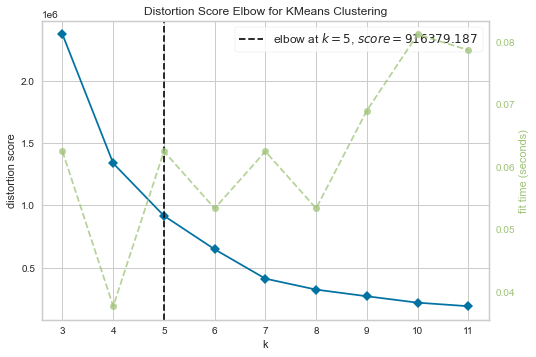

In [17]:
# Yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion')
visualizer.fit(X)
visualizer.poof();

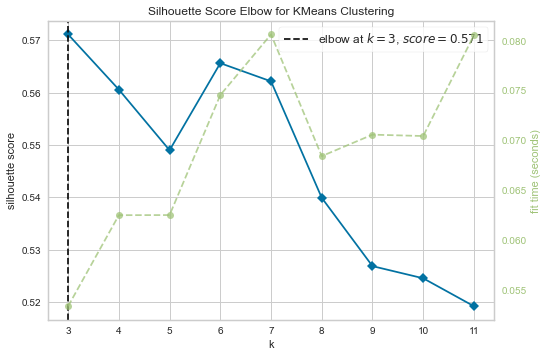

In [18]:
# Yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='silhouette')
visualizer.fit(X)
visualizer.poof();

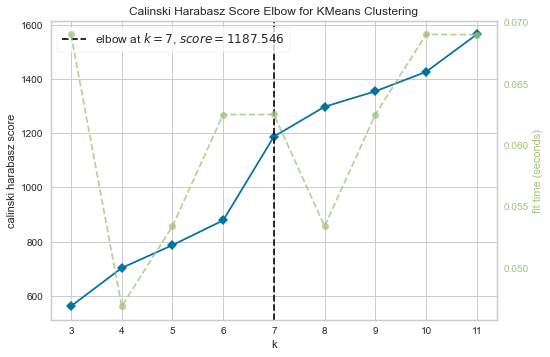

In [20]:
# Yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='calinski_harabasz')
visualizer.fit(X)
visualizer.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

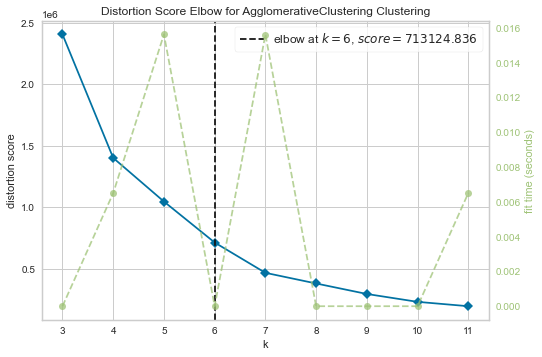

In [22]:
# Yellowbrick
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(X)
visualizer.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [25]:
model = KMeans(n_clusters=6)
model.fit(X)

KMeans(n_clusters=6)

In [27]:
X['clusters'] = model.labels_

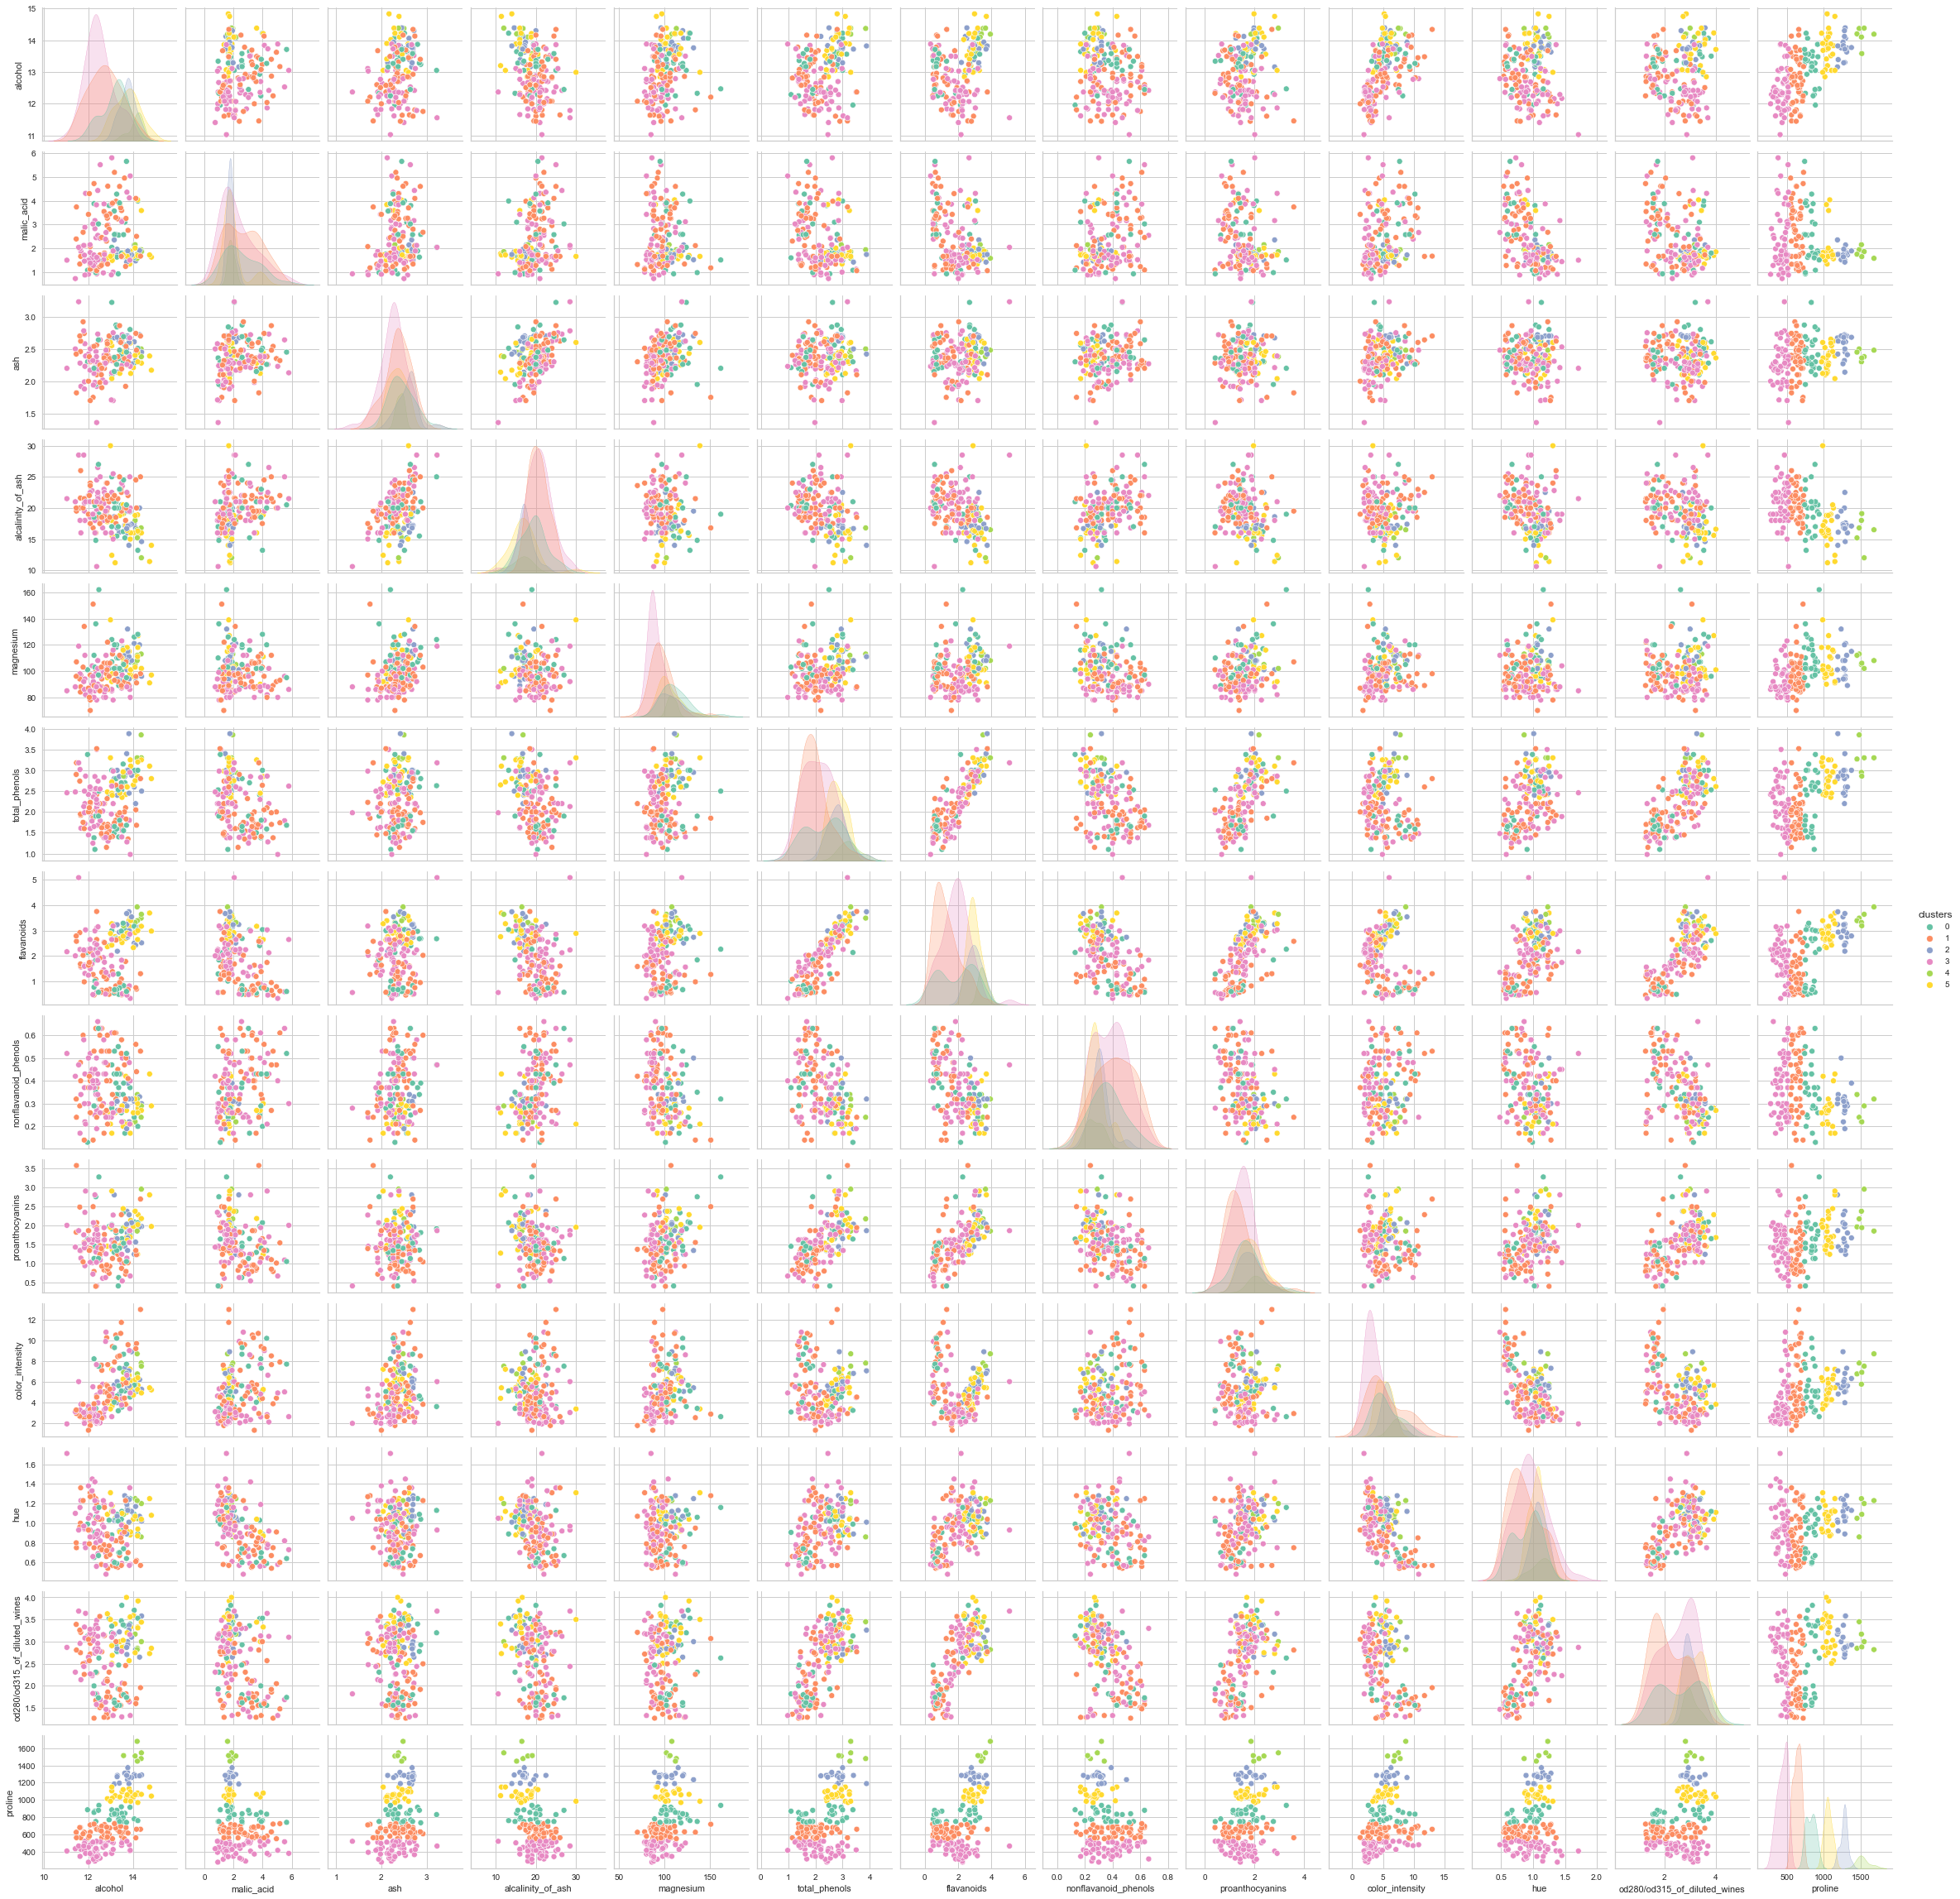

In [40]:
sns.pairplot(data=X, hue='clusters', palette = "Set2");

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [32]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X.drop('clusters', axis = 1))
df_pca= pd.DataFrame(data = pca_data , columns = ['pc_1', 'pc_2'])

C:\Users\Francisco Galan\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


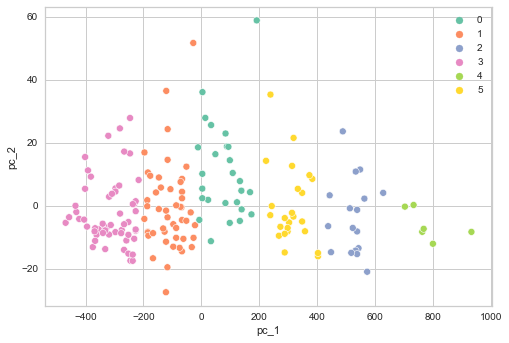

In [35]:
sns.scatterplot(df_pca['pc_1'], df_pca['pc_2'], hue =model.labels_, palette = "Set2");

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

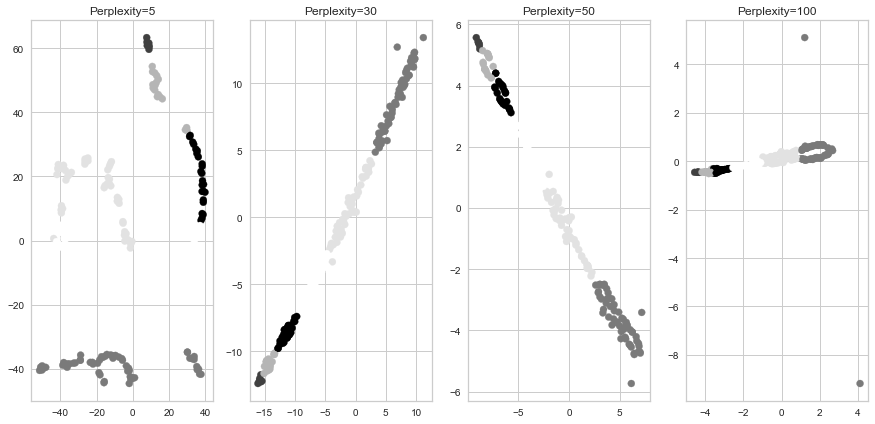

In [39]:
fig, ax = plt.subplots(1,4,figsize=(15,7))

for i, perp in enumerate([5,30,50,100]):
    tsne = TSNE(perplexity=perp, random_state=1)
    joint = tsne.fit_transform(df_pca[['pc_1','pc_2']])
    ax[i].scatter(joint[:,0],joint[:,1],c=model.labels_)
    ax[i].set_title(f'Perplexity={perp}')
plt.show()